In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *

import warnings
warnings.filterwarnings('ignore')

from plotnine import *
import plotnine as p9
import plotly.express as px
import plotly.graph_objects as go

In [3]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [11]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Вариант 2. 
## Задание 1 - Датасет diamonds

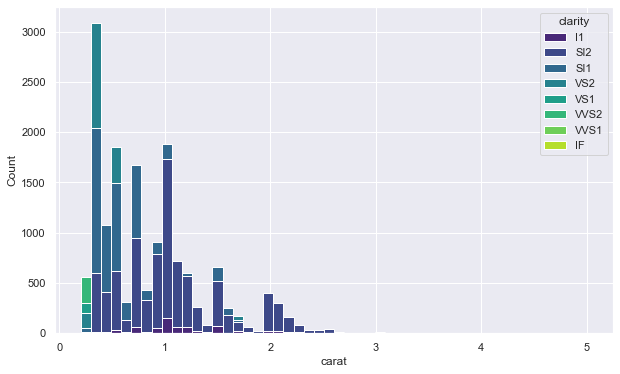

In [10]:
sns.set_theme()

sorter = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

plt.figure(figsize=(10,6))           
ax  = sns.histplot(data = df_diamonds, x = 'carat', hue = 'clarity', palette="viridis", bins = 50, alpha=1, hue_order=sorter);

## Задание 2 - Датасет mtcars

In [12]:
df_mtcars = pd.read_csv('mtcars.csv')
df_mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


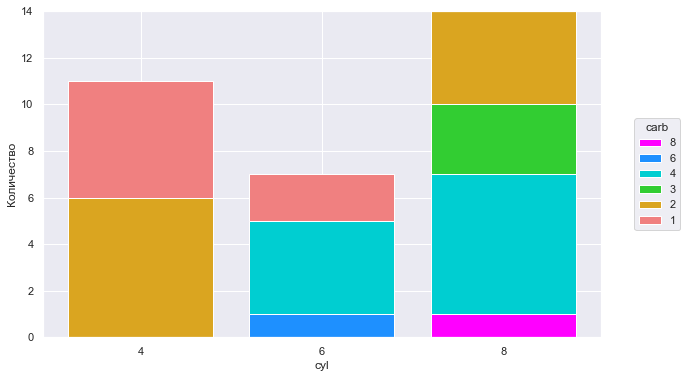

In [18]:
sns.set_theme()
plt.figure(figsize=(10,6)) 

tb = pd.crosstab(df_mtcars.cyl,df_mtcars.carb)
c_name = list(reversed(ct.columns))

_,shape = tb.shape
x = [str(i) for i in ct.index]
y = [tb.iloc[:,i].values for i in range(shape)]
y = [i for i in reversed(y)]
colors=['magenta','dodgerblue','darkturquoise',
        'limegreen','goldenrod','lightcoral']

bottom = [0,0,0]
for i in range(shape):
    plt.bar(x, y[i], bottom=bottom, color=colors[i],label=c_name[i])
    bottom += y[i]
plt.xlabel("cyl")
plt.ylabel("Количество")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),title='carb')
plt.show()

## Задание 3 - Датасет ChickWeight

In [30]:
df_chick = pd.read_csv('ChickWeight.csv')
df_chick = df_chick.iloc[:, 1:]
df_chick.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1
...,...,...,...,...
95,42,0,9,1
96,51,2,9,1
97,59,4,9,1
98,68,6,9,1


Описание датасета:

+ weight - вес цыпленка
+ Time - возраст цыпленка в днях
+ Chick - номер цыпленка (идентификатор)
+ Diet - номер диеты цыпленка 

Сперва посмотрим сбалансированность эксперимента по диетам - скольким цыплятам была прописана та или иная диета:

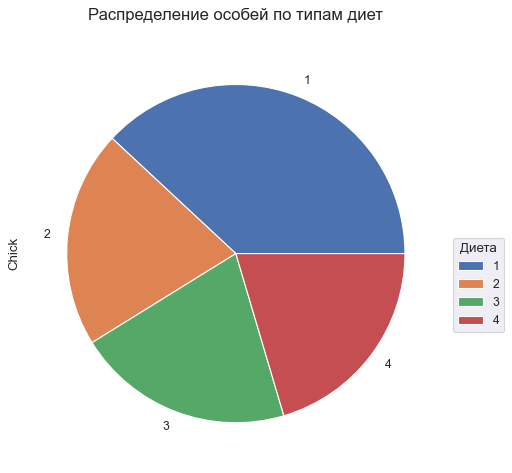

In [34]:
plt.figure(figsize=(9,7), dpi= 80)
df_chick.groupby('Diet')['Chick'].count().plot(kind = 'pie')
plt.title('Распределение особей по типам диет', pad = 20, fontsize = 15)
plt.legend(loc=3,bbox_to_anchor=(1, 0.3), title= 'Диета')
plt.show() 

Видим баланс с некоторым превалированием диеты 1

Теперь, чтобы понимать насколько данные по весу показательны, посмотрим разброс возрастов особей в момент измерения.
Ведь если замеры веса сделаны в разном возрасте, то вывод об эффективности диеты сделать сложно.

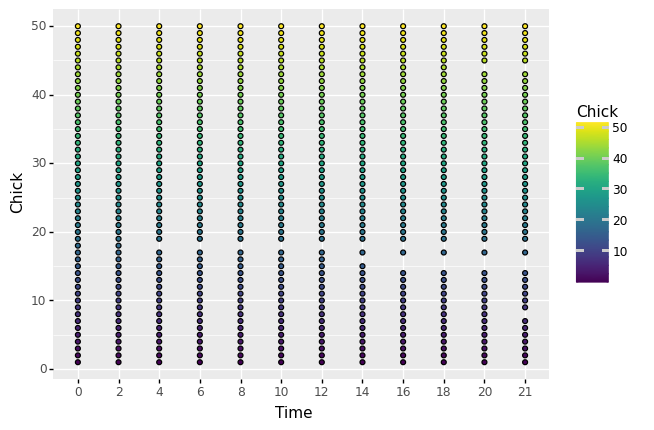

<ggplot: (196520266783)>

In [46]:
qplot(x='Time',y='Chick',data=df_chick, fill='Chick')

Мы видим, что в выборке цыплята разных возрастов и возрастные категории сбалансированны. Следовательно информацию об эффективности диеты напрямую получить не можем. Однако мы можем посмотреть корреляцию веса и возраста птицы.

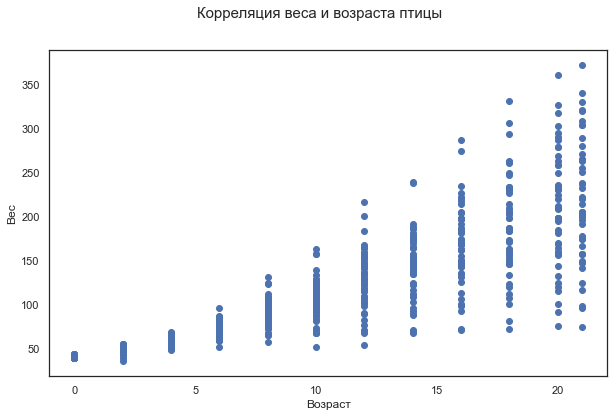

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_chick['Time'], y = df_chick['weight'])
plt.xlabel("Возраст")
plt.ylabel("Вес")

fig.suptitle("Корреляция веса и возраста птицы", 
             fontsize = 15)

plt.show()

Ожидаемо мы видим сильную положительную корреляцию.